In [1]:
import matplotlib.pyplot as plt

In [2]:
def sort_num(img_path_ls):
    # 桁数の異なる数字を名前に持つファイルの並び替え
    # ~/img1.bmp, ~/img100.bmp
    sorted_ls = [""] * len(img_ls)

    for path in img_path_ls:

        id_ = path.split("img")[1].split(".")[0] 

        sorted_ls[int(id_)] = path

    return sorted_ls


def 画像処理の関数

In [3]:
# 画像処理
def img_preprocessing(img):
    from skimage import color, filters, util
    plt.rcParams["image.cmap"] = "gray"

    # gray
    img_gray = color.rgb2gray(img)

    # 二値化
    thres = filters.threshold_otsu(img_gray)
    img_bin = img_gray > thres

    # edge 検知
    img_temp = filters.sobel(img_gray)
    img_sob = util.invert(img_temp)

    # fill hole
    def fill_holes_erosion_dilation(img_bin):
        from scipy.ndimage.morphology import binary_fill_holes
        from skimage.morphology import erosion, dilation

        img_fill_holes = util.invert(img_bin)
        img_fill_holes = binary_fill_holes(img_fill_holes).astype(int)
        img_fill_holes = util.invert(img_fill_holes)

        # erosion
        eroded = erosion(img_fill_holes)
        for i in range(3):
            eroded = erosion(eroded)

        # dilation
        dilated = dilation(eroded)
        for i in range(3):
            dilated = dilation(dilated)
        dilated = util.invert(dilated)
        dilated = binary_fill_holes(dilated).astype(int)
        return dilated

    dilated = fill_holes_erosion_dilation(img_bin)
    
    return img_sob, img_gray, img_bin, dilated


In [8]:
def show_img(i, img, img_sob, img_gray, img_bin, dilated):
    plt.figure(figsize=(8, 8))

    plt.subplot(221)
    plt.title("sauce:" + str(i))
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(222)
    plt.title("edge:sob")
    plt.imshow(img_sob)
    #plt.imshow(img_gray)
    plt.axis("off")

    plt.subplot(223)
    plt.title("binary")
    plt.imshow(img_bin)
    plt.axis("off")

    plt.subplot(224)
    plt.title("fill hole")
    plt.imshow(dilated)
    plt.axis("off")

    plt.show()


Path取得

In [5]:
# Read
import glob
dir_ls = glob.glob("D:\Tanimoto_eLife_Fig3B\*")
sample_dir_path = dir_ls[0]
img_ls = glob.glob(sample_dir_path + "/main/*")
img_ls = sort_num(img_ls)
sample_img_path = img_ls[0]
#del img_ls, dir_ls

前処理結果

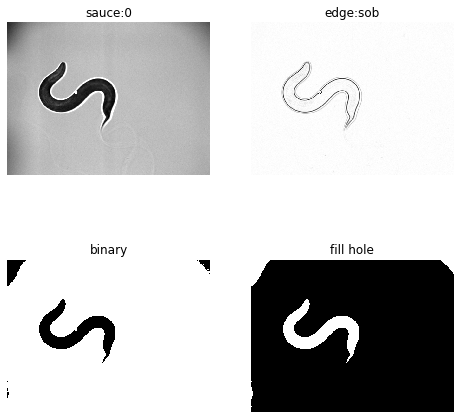

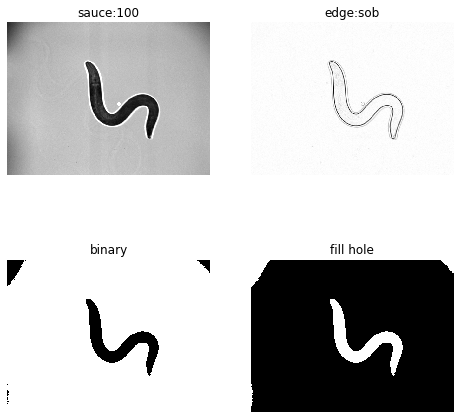

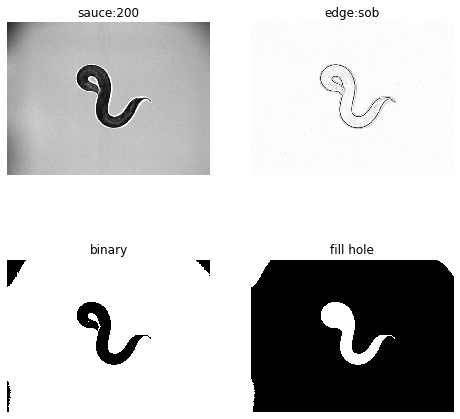

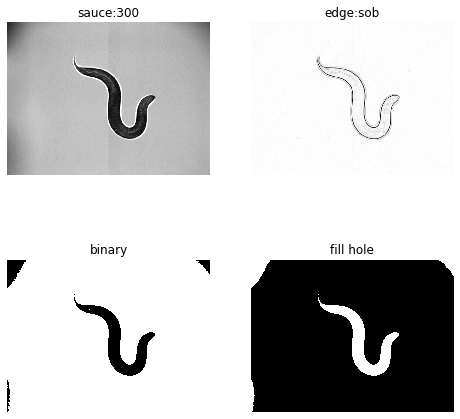

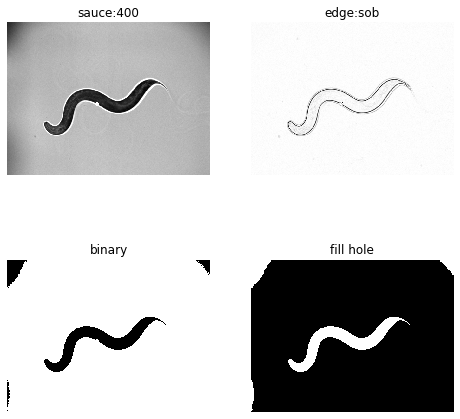

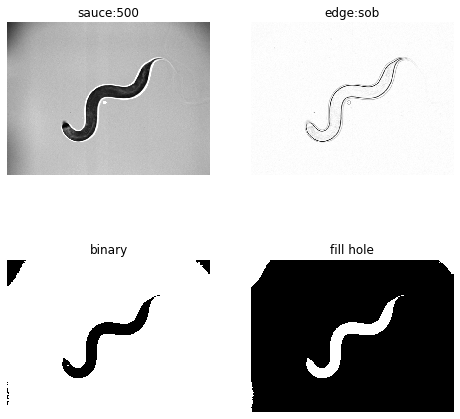

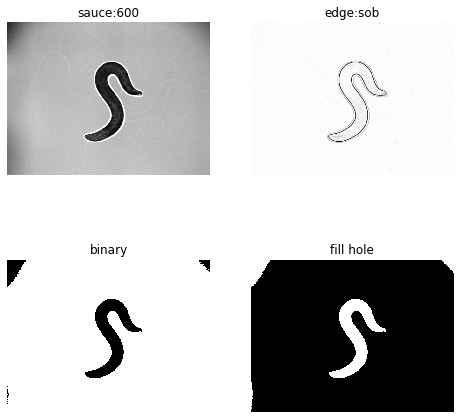

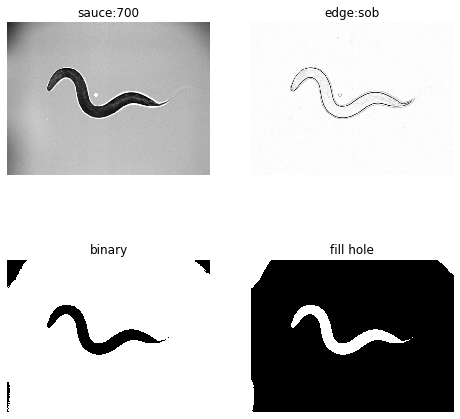

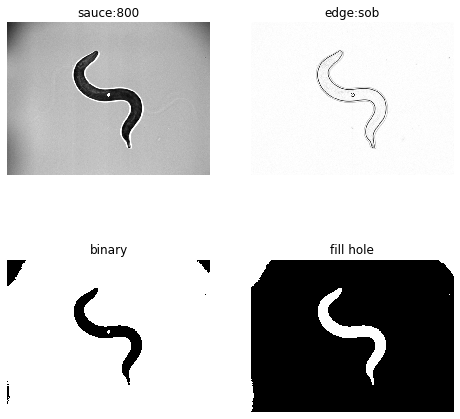

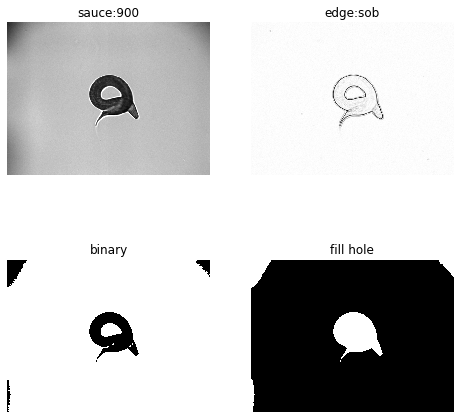

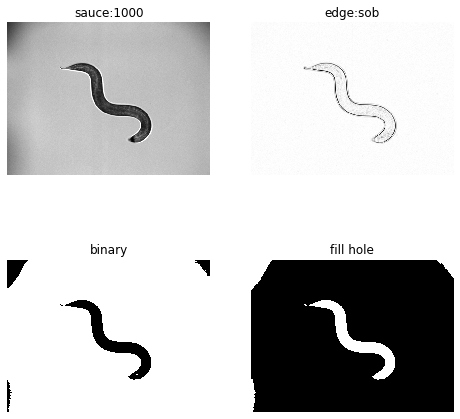

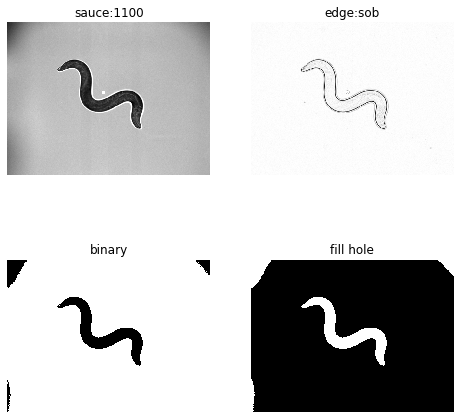

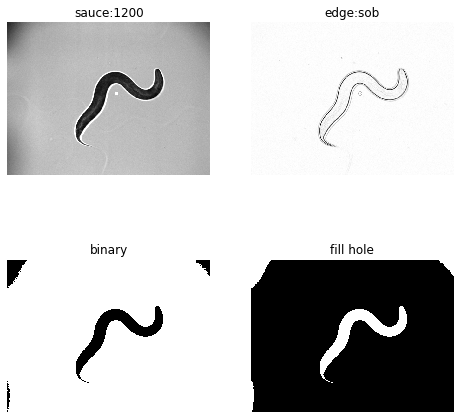

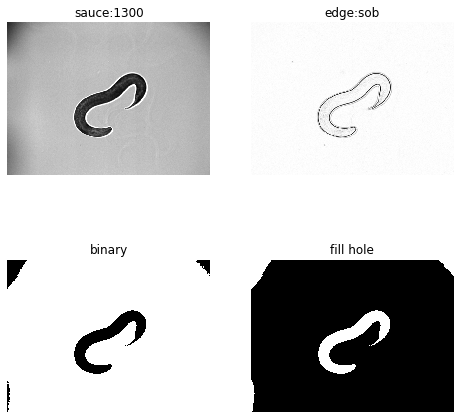

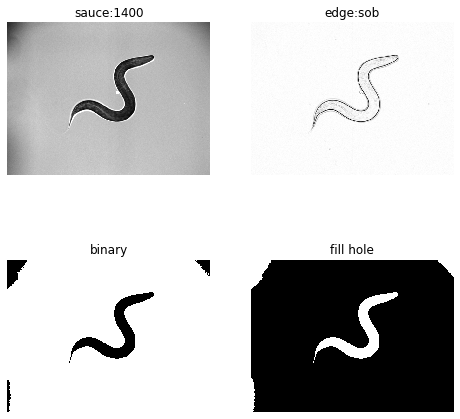

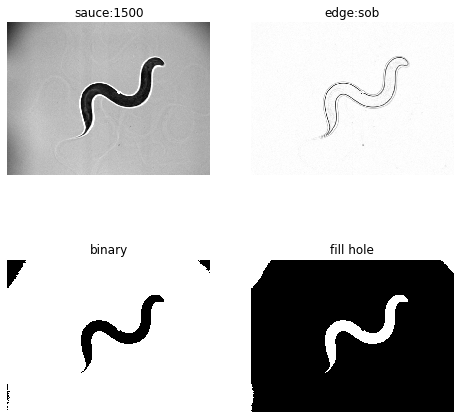

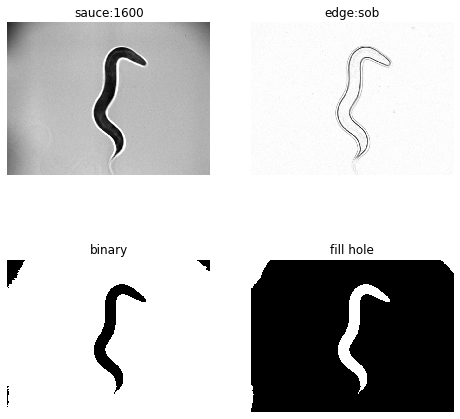

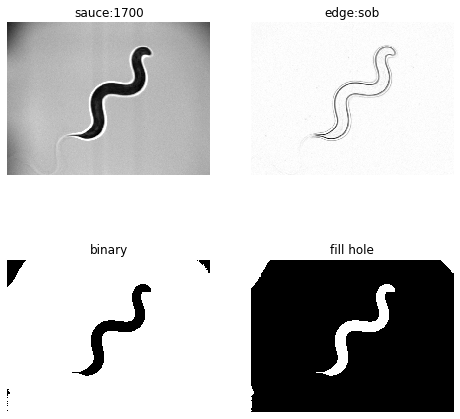

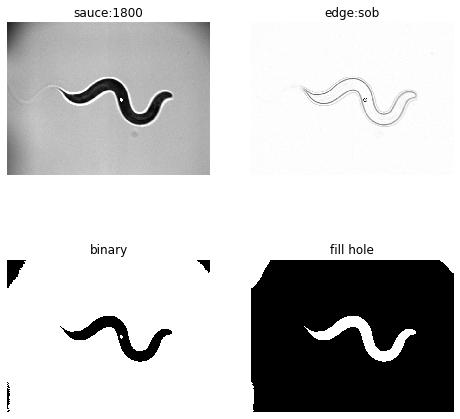

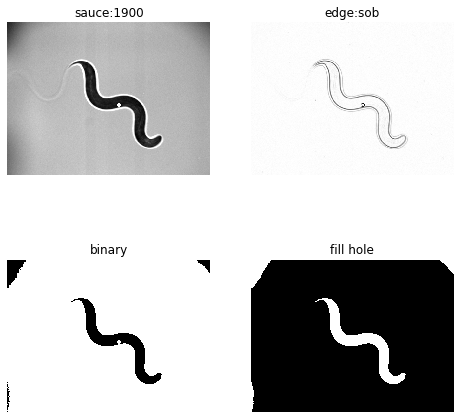

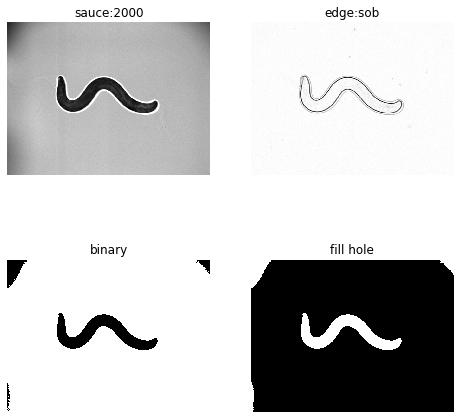

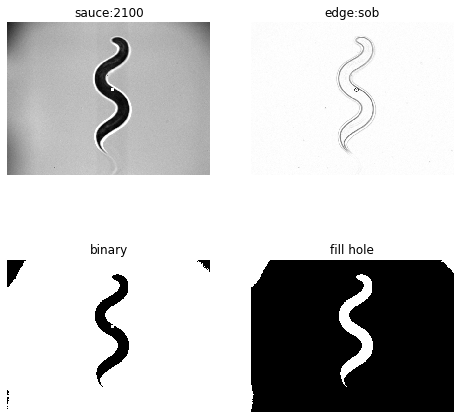

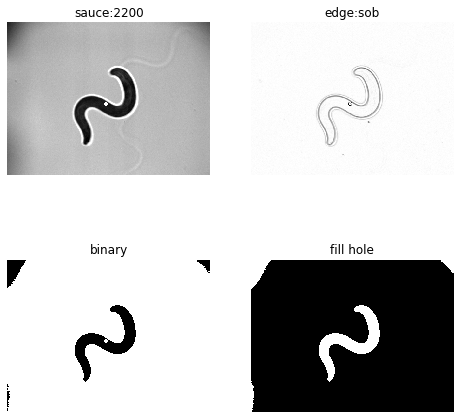

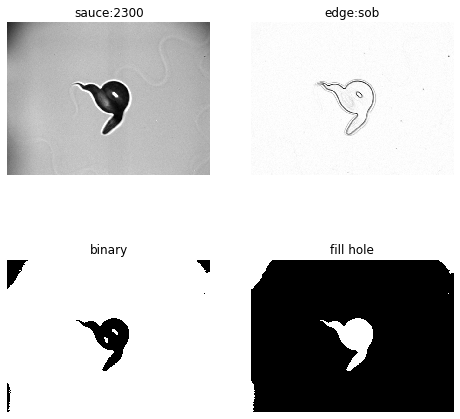

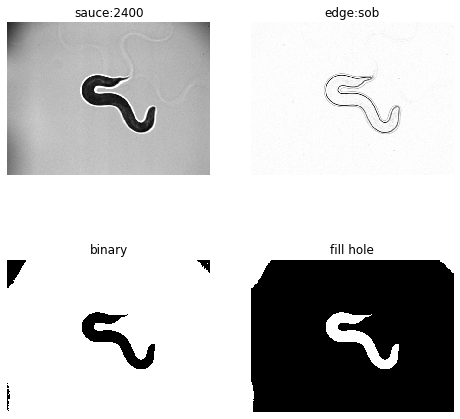

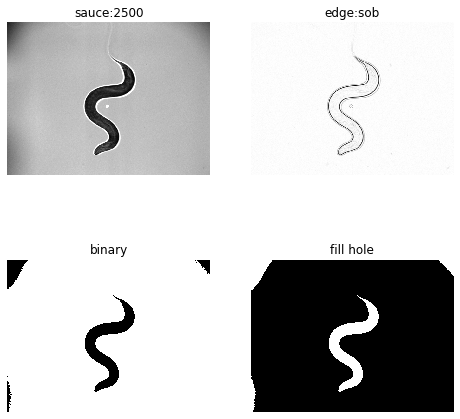

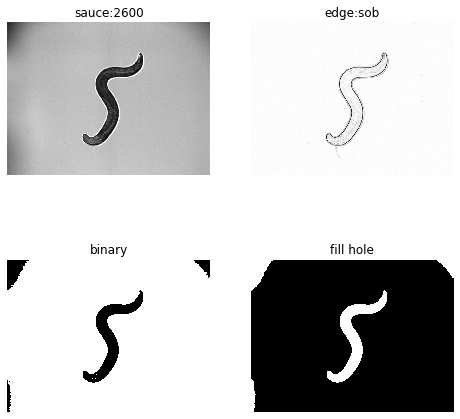

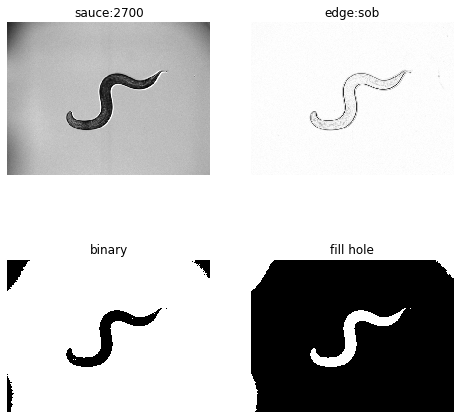

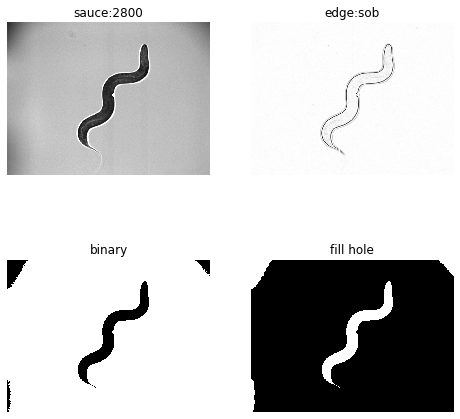

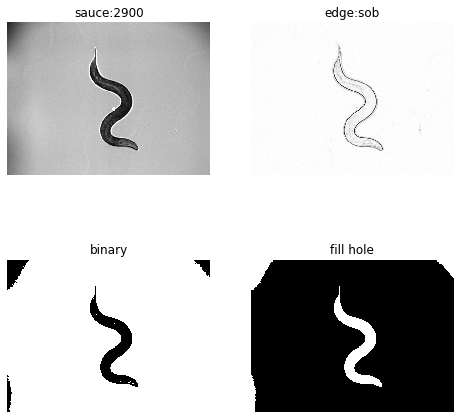

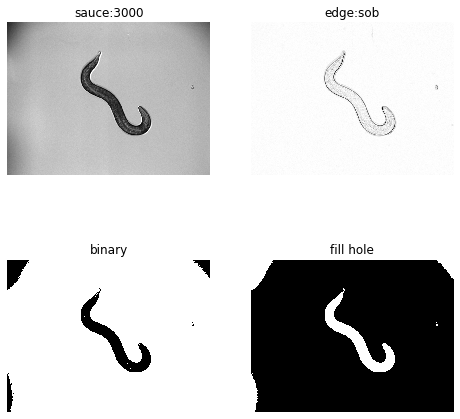

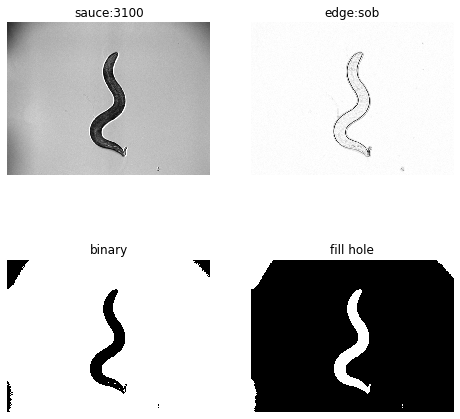

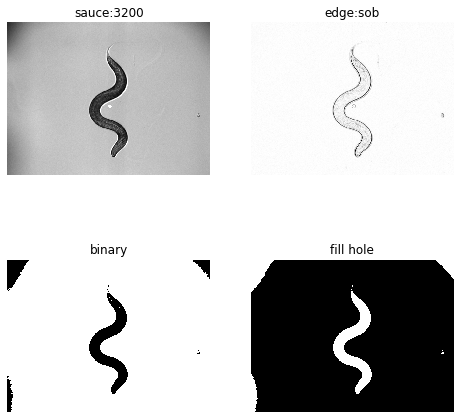

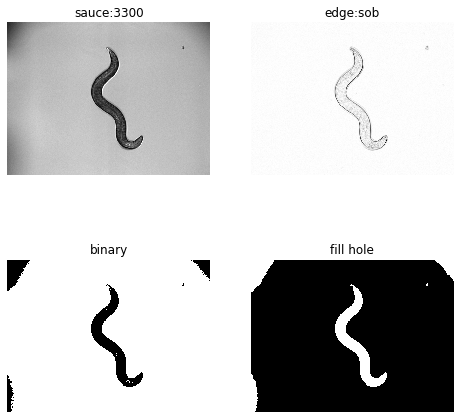

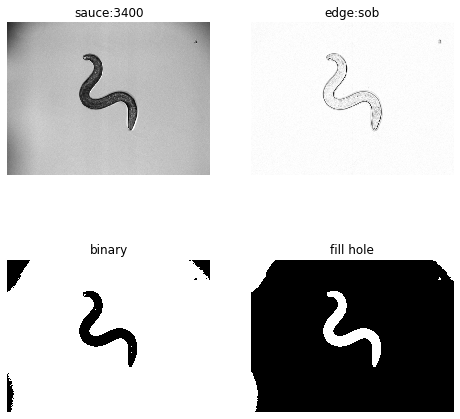

In [9]:
# dir_ls[0]の画像
from skimage import data
for i, img_path in enumerate(img_ls):
    if i % 100 == 0:
        img = data.imread(img_path)
        img_sob, img_gray, img_bin, dilated = img_preprocessing(img)
        show_img(i, img, img_sob, img_gray, img_bin, dilated)
del img, img_sob, img_gray, img_bin, dilated


In [ ]:
# convert command
# jupyter nbconvert --to html visualize_train_images.ipynb